# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

#  Data Loading and Inspection

In [2]:

california_housing = fetch_california_housing(as_frame=True)
housing = california_housing.frame

**Project Implementation**

In [3]:

housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Show statistical summary
housing.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Data Cleaning

In [6]:
# Check for missing values
print(housing.isnull().sum())

# Since the California Housing Prices dataset is generally clean, no missing values should be found.

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# Exploratory Data Analysis (EDA)

Distribution of the target variable (Median House Value)

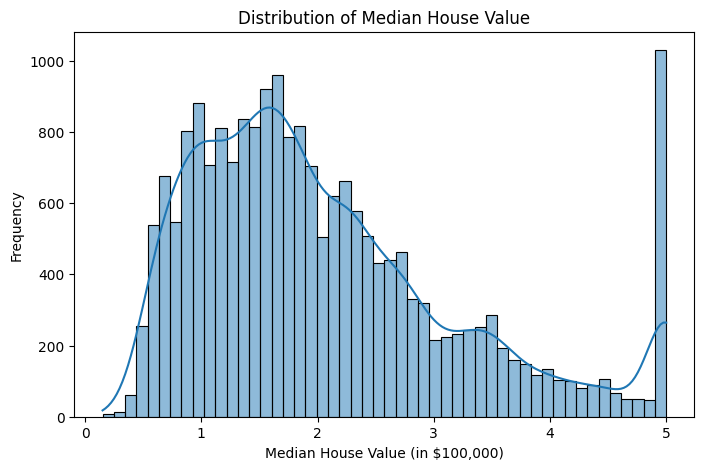

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(housing['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Frequency')
plt.show()



> A histogram shows the distribution of median house values, providing insights into the price range of houses in California.



Scatter plot of median income vs. median house value

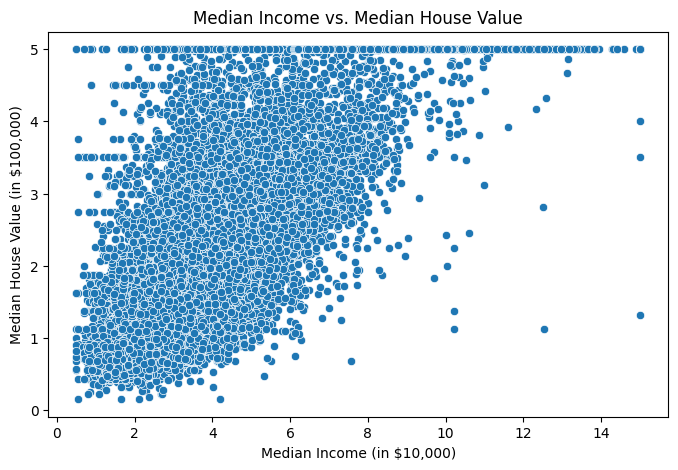

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=housing)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (in $10,000)')
plt.ylabel('Median House Value (in $100,000)')
plt.show()



> A scatter plot shows the relationship between median income and house value, indicating a positive correlation.



Correlation matrix heatmap

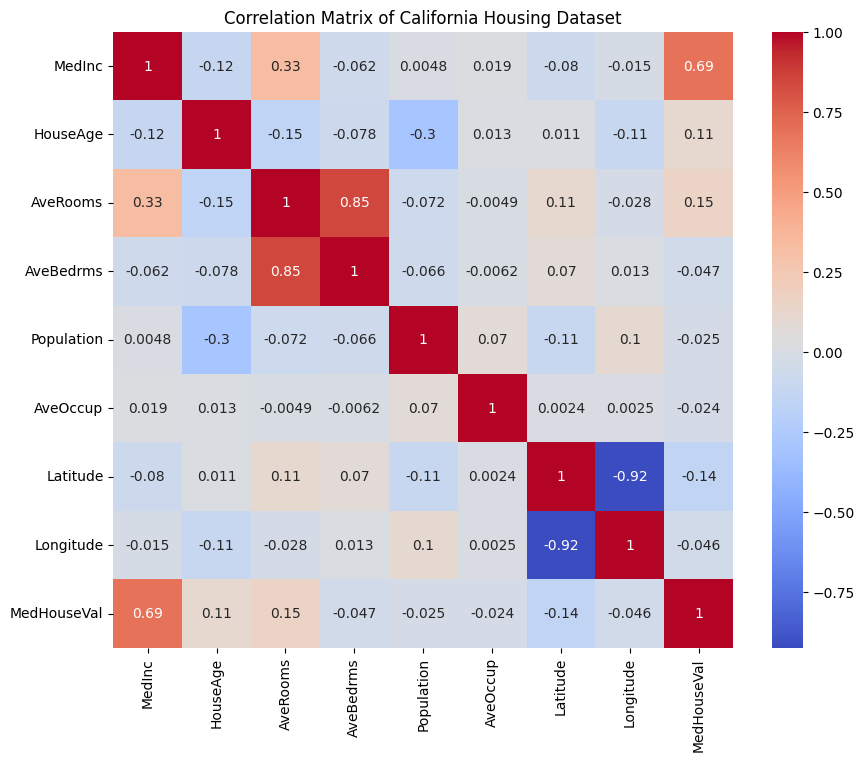

In [9]:
plt.figure(figsize=(10, 8))
corr = housing.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of California Housing Dataset')
plt.show()



> The heatmap visualizes correlations between all features, highlighting which features are most strongly associated with house prices.



Pair plot of selected features

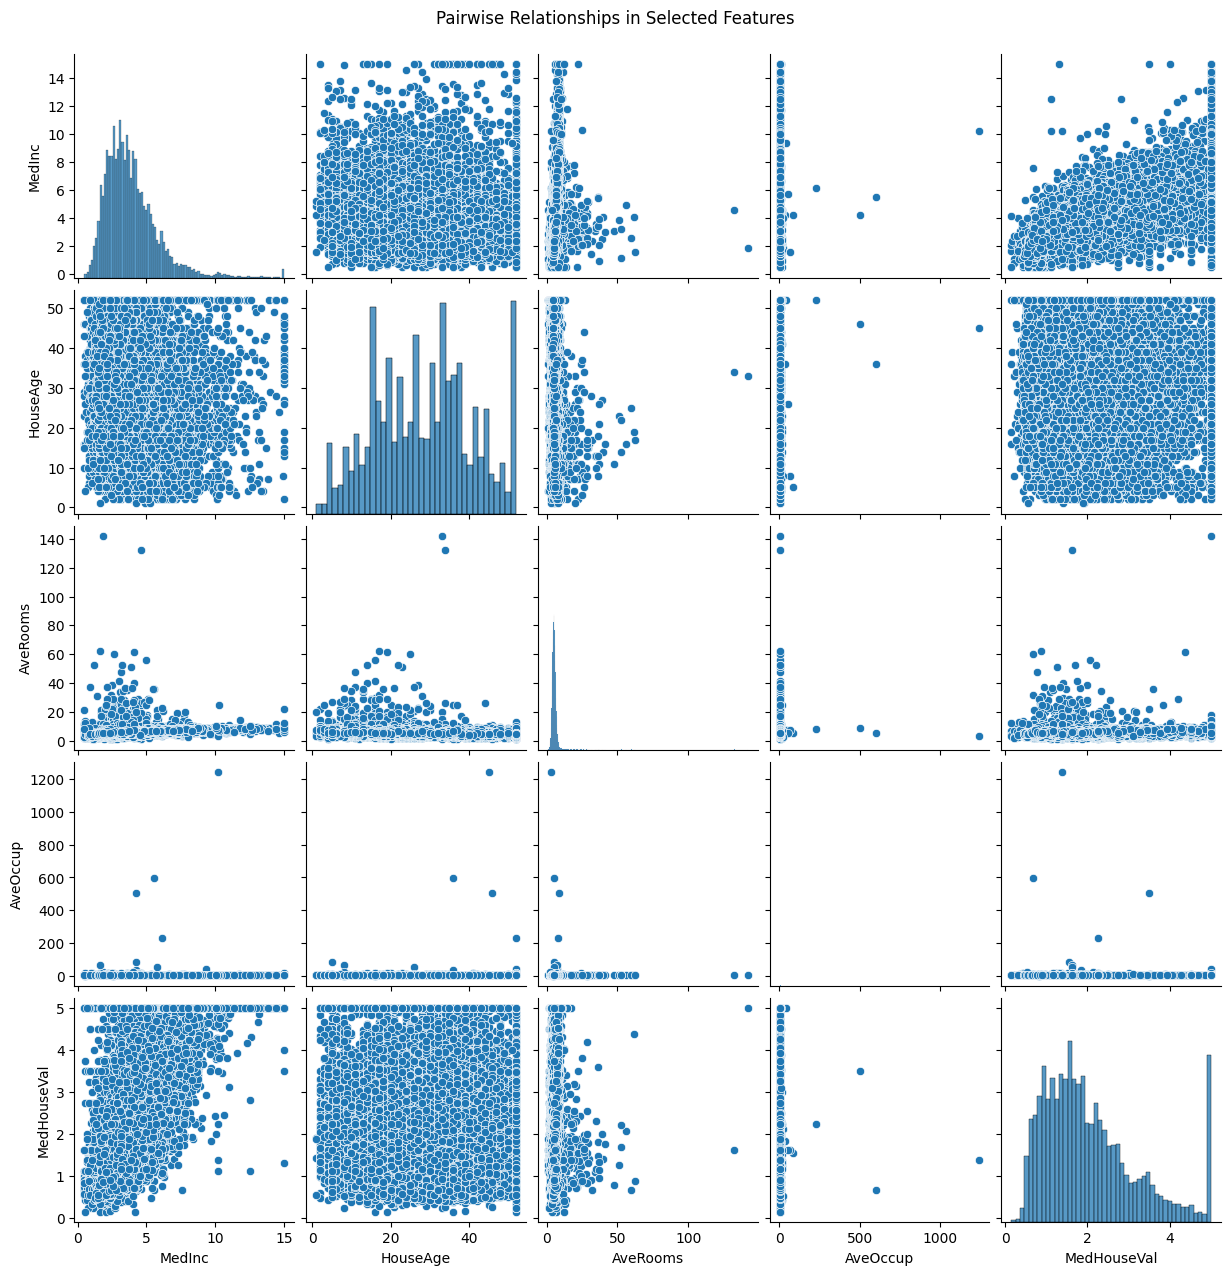

In [10]:
sns.pairplot(housing[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])
plt.suptitle("Pairwise Relationships in Selected Features", y=1.02)
plt.show()

>  A pair plot shows relationships between selected features, providing insights into how features are interrelated and how they relate to the target variable.

Distribution of House Age

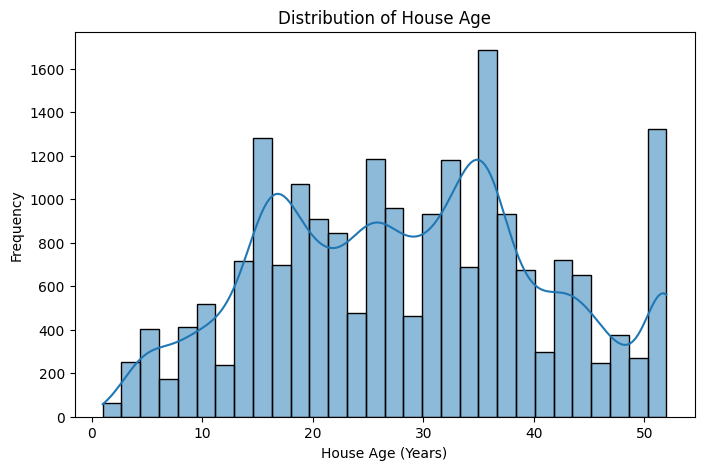

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(housing['HouseAge'], bins=30, kde=True)
plt.title('Distribution of House Age')
plt.xlabel('House Age (Years)')
plt.ylabel('Frequency')
plt.show()

> A histogram shows the distribution of house ages, highlighting the most common age range of houses in the dataset. This helps to understand the age demographics of the housing market.

Relationship Between Population and House Value

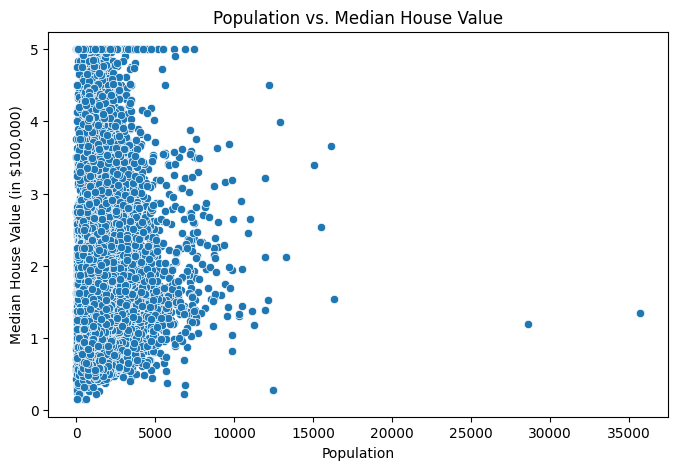

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Population', y='MedHouseVal', data=housing)
plt.title('Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value (in $100,000)')
plt.show()

> A scatter plot shows how the population in a given area relates to house prices, which can reveal whether more populated areas tend to have higher or lower house values.

Average Number of Rooms vs. House Value

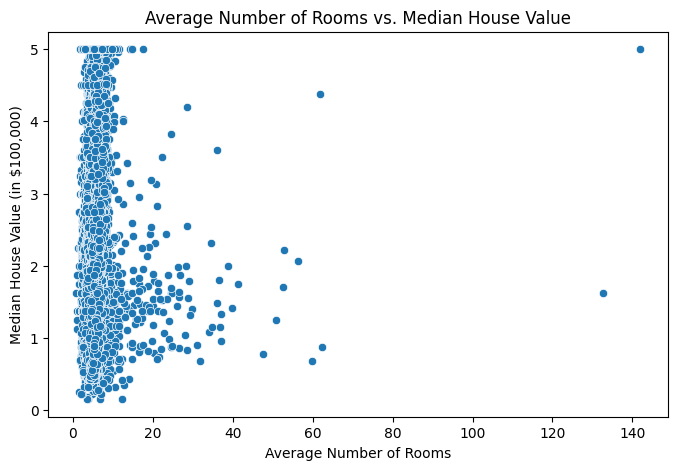

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=housing)
plt.title('Average Number of Rooms vs. Median House Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (in $100,000)')
plt.show()



> This scatter plot helps to visualize the relationship between the average number of rooms in a house and its median value, showing whether more rooms correlate with higher prices.



House Value by Proximity to the Ocean

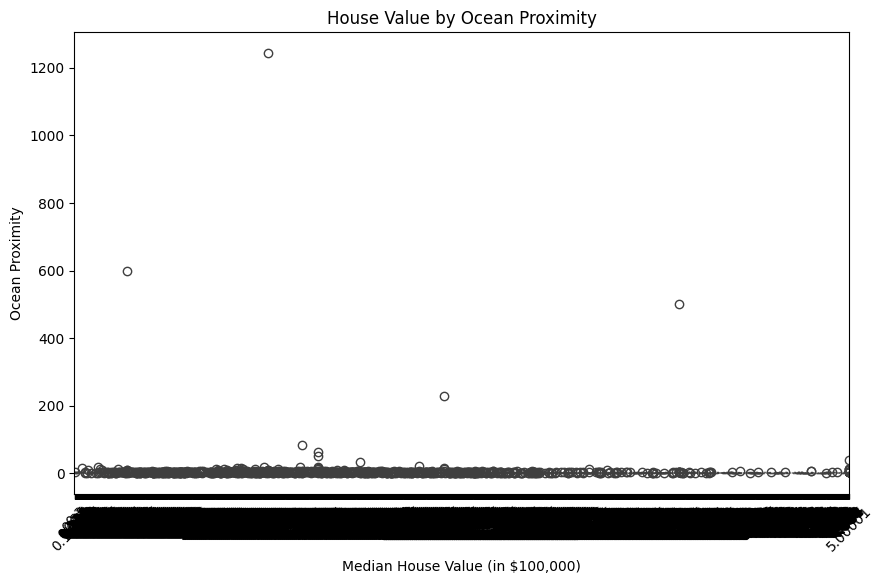

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing['MedHouseVal'], y=housing['AveOccup'])
plt.title('House Value by Ocean Proximity')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

>This box plot shows the distribution of house values based on their proximity to the ocean, highlighting the impact of location (especially coastal proximity) on real estate prices.

Density Plot for Total Number of Rooms

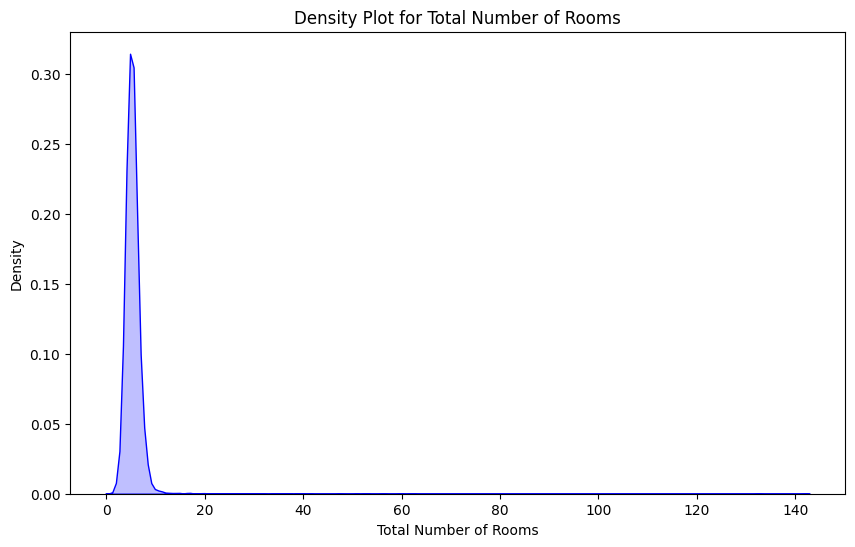

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=housing, x='AveRooms', fill=True, color='blue')
plt.title('Density Plot for Total Number of Rooms')
plt.xlabel('Total Number of Rooms')
plt.ylabel('Density')
plt.show()

> A KDE plot shows the density distribution of the total number of rooms across all houses, providing insights into typical housing sizes and any potential skew in room count.

Relationship Between Median Income and House Age

<Figure size 800x500 with 0 Axes>

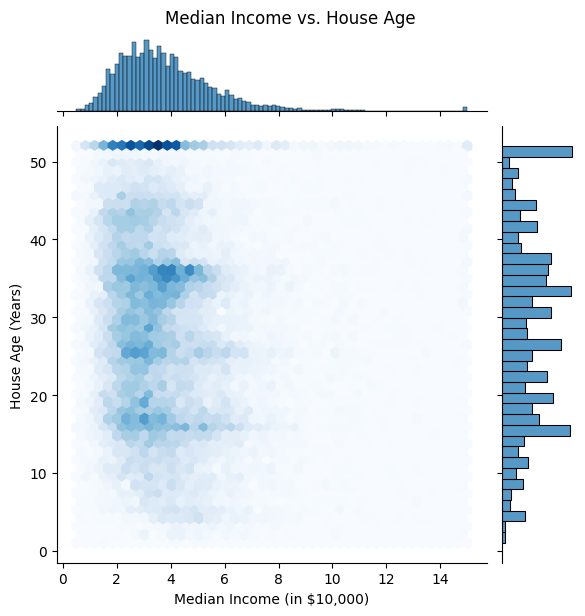

In [16]:
plt.figure(figsize=(8, 5))
sns.jointplot(x='MedInc', y='HouseAge', data=housing, kind='hex', cmap='Blues')
plt.suptitle('Median Income vs. House Age', y=1.02)
plt.xlabel('Median Income (in $10,000)')
plt.ylabel('House Age (Years)')
plt.show()

> A joint plot shows the relationship between median income and house age, revealing patterns such as whether newer houses are built in higher-income areas.

Average Occupancy vs. House Value

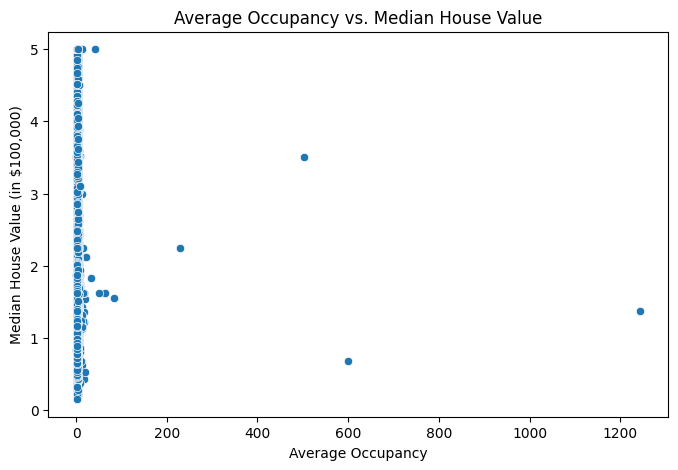

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AveOccup', y='MedHouseVal', data=housing)
plt.title('Average Occupancy vs. Median House Value')
plt.xlabel('Average Occupancy')
plt.ylabel('Median House Value (in $100,000)')
plt.show()

> This scatter plot shows how the average number of occupants per house relates to house value, which can indicate how population density in households impacts pricing.

Pair Plot of Engineered Features

# Feature Engineering

In [19]:

housing['RoomsPerHousehold'] = housing['AveRooms'] / housing['AveOccup']

In [20]:

housing['BedPerRoom'] = housing['AveBedrms'] / housing['AveRooms']

In [21]:

print(housing[['RoomsPerHousehold', 'BedPerRoom']].head())

   RoomsPerHousehold  BedPerRoom
0           2.732919    0.146591
1           2.956685    0.155797
2           2.957661    0.129516
3           2.283154    0.184458
4           2.879646    0.172096


# Additional Data Visualizations

KDE plot of house age distribution

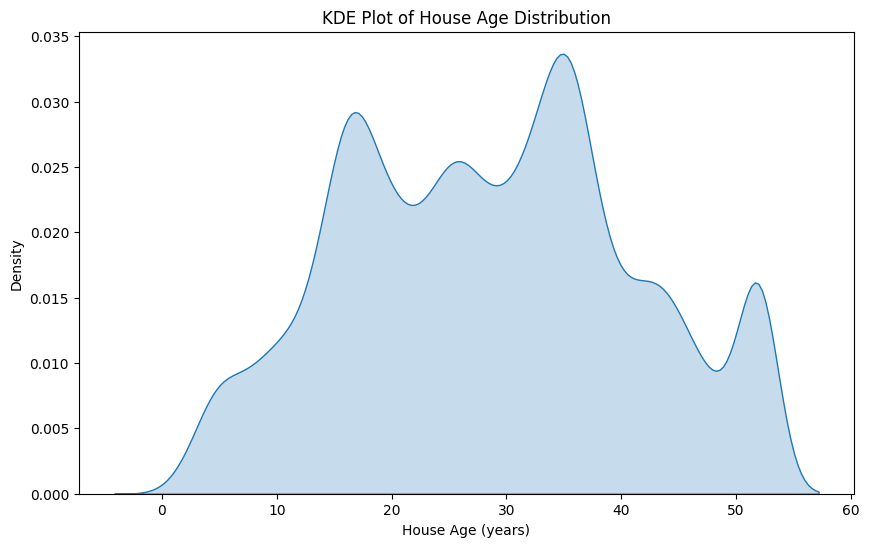

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=housing, x='HouseAge', fill=True)
plt.title('KDE Plot of House Age Distribution')
plt.xlabel('House Age (years)')
plt.ylabel('Density')
plt.show()

> A KDE plot shows the distribution of house ages in the dataset, providing insights into the common age of houses.

# Summary of Analysis



*   **House Value Distribution**: Most houses are valued below $300,000, with a skew towards higher-priced homes due to a small number of expensive properties.

*   **Income and House Value**: Higher median income is strongly correlated with higher house values, indicating that wealthier neighborhoods have more expensive homes.

*   **House Age**: The majority of houses are relatively old, with the highest concentration around 30-40 years, showing a mix of old and new developments.

*   **Rooms and House Value**: Houses with more rooms generally have higher median values, highlighting the importance of space in real estate pricing.
*  **Ocean Proximity**: Houses closer to the ocean tend to have higher values, emphasizing the premium associated with coastal locations.


*   **Population Impact**: No direct relationship between population size and house prices, suggesting other factors play a more significant role.


*   **Feature Correlations**: Features such as the number of rooms and median income show strong correlations with house values, making them key indicators in property valuation.


*   **Occupancy and House Value**: Higher occupancy levels correlate with lower house values, indicating a preference for less crowded living conditions.

